
#**Creative Recipes in Culinary Art**
Kshitija Ghate, \
Student ID: 210817540 \
email: k.ghate@se21.qmul.ac.uk

### **All Imports and Notebook Settings**

I am facing issues with downloading my google drive files using **gdown**. 
I am sharing my trained model folder link.
Please copy **creative_recipes_in_culinary_art**.**h5** and **checkpoints** folder in **cc_project_model** folder in your google drive.


Google drive folder link \
https://drive.google.com/drive/folders/1-BMUj5fWlFTMCB4Tnxkq1yUwO9b76S-O?usp=sharing

\
Dataset link \
https://raw.githubusercontent.com/kshitija17/Creative-Recipes-in-Culinary-Art/main/IndianFoodDatasetCSV.csv

In [ ]:
import pandas as pd

import tensorflow as tf
# tf.enable_eager_execution()
import matplotlib.pyplot as plt
import numpy as np
import platform
import time
import pathlib
import os

In [ ]:
# Install required packages

# Install language detect 
!pip install langdetect

 # install h5py
!pip install pyyaml h5py

# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# for output text wrap

from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
# # check for gpu

# %tensorflow_version 2.x
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

### **Dataset Import and Preprocessing**

In [ ]:
# import dataset csv file
dataset_url = 'https://raw.githubusercontent.com/kshitija17/Creative-Recipes-in-Culinary-Art/main/IndianFoodDatasetCSV.csv'
data_frame = pd.read_csv(dataset_url)
# data_frame

In [ ]:
# create a data frame with recipe name, ingredients, and instructions from the dataset

df = data_frame[['TranslatedRecipeName','TranslatedIngredients','TranslatedInstructions']]
df = df.rename(columns={'TranslatedRecipeName':'RecipeName','TranslatedIngredients':'Ingredients','TranslatedInstructions':'Instructions'})
df

,RecipeName,Ingredients,Instructions
0,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","To begin making the Masala Karela Recipe,de-se..."
1,Spicy Tomato Rice (Recipe),"2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...","To make tomato puliogere, first cut the tomato..."
2,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","To begin making the Ragi Vermicelli Recipe, fi..."
3,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...",To begin making Gongura Chicken Curry Recipe f...
4,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 tablespoon chana dal, 1 tablespoon white ura...","To make Andhra Style Alam Pachadi, first heat ..."
...,...,...,...
6866,Goan Mushroom Xacuti Recipe,"20 बटन मशरुम,2 प्याज - काट ले,1 टमाटर - बारीक ...",गोअन मशरुम जकुटी रेसिपी बनाने के लिए सबसे पहले...
6867,Sweet Potato & Methi Stuffed Paratha Recipe,"1 बड़ा चम्मच तेल,1 कप गेहूं का आटा,नमक - स्वाद ...",शकरकंदी और मेथी का पराठा रेसिपी बनाने के लिए स...
6868,Ullikadala Pulusu Recipe | Spring Onion Curry,150 grams Spring Onion (Bulb & Greens) - chopp...,To begin making Ullikadala Pulusu Recipe | Spr...
6869,Kashmiri Style Kokur Yakhni Recipe-Chicken Coo...,"1 kg Chicken - medium pieces,1/2 cup Mustard o...",To begin making the Kashmiri Kokur Yakhni reci...


In [ ]:
# detect language for all columns

from langdetect import detect

df['detectInstructions'] = df['Instructions'].apply(detect)
df['detectIngredients'] = df['Ingredients'].astype(str).apply(detect)
df['detectRecipeName'] = df['RecipeName'].astype(str).apply(detect)


# filter rows, Keep only recipes written in English
df = df[df['detectInstructions'] == 'en']
df = df[df['detectIngredients'] == 'en']
df = df[df['detectRecipeName'] == 'en']

df

,RecipeName,Ingredients,Instructions,detectInstructions,detectIngredients,detectRecipeName
1,Spicy Tomato Rice (Recipe),"2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...","To make tomato puliogere, first cut the tomato...",en,en,en
3,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...",To begin making Gongura Chicken Curry Recipe f...,en,en,en
4,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 tablespoon chana dal, 1 tablespoon white ura...","To make Andhra Style Alam Pachadi, first heat ...",en,en,en
5,Pudina Khara Pongal Recipe (Rice and Lentils C...,"1 cup Rice - soaked for 20 minutes,1/2 cup Yel...","To begin making Pudina Khara Pongal Recipe, wa...",en,en,en
6,Udupi Style Ash Gourd Coconut Curry Recipe,500 grams Vellai Poosanikai (Ash gourd/White P...,To begin making the Udupi Style Ash Gourd Coco...,en,en,en
...,...,...,...,...,...,...
6862,Creamy Spinach And Potato Breakfast Casserole ...,"1/2 cup Onions - chopped,1 cup Soy Chunks (Nug...",To begin making Creamy Spinach And Potato Brea...,en,en,en
6863,Saffron Paneer Peda Recipe,2 cups Paneer (Homemade Cottage Cheese) - crum...,To begin making the Saffron Paneer Peda recipe...,en,en,en
6864,Italian Arancini Rice Balls Recipe With Delici...,1-1/2 cup Risotto - cooked risotto (recipe bel...,To begin making the Italian Arancini Rice Ball...,en,en,en
6865,Quinoa Phirnee Recipe (Quinoa Milk Pudding),"1 cup Quinoa,3/4 cup Sugar,1 teaspoon Cardamom...","To begin making Quinoa Phirnee Recipe, place a...",en,en,en


In [ ]:
# adding stop words for recipe name, ingredients, instructions

stop_word_recipe_name = '$'
stop_word_recipe_ingredients = '@'
stop_word_recipe_instructions = '*'

# Combine recipe name, ingredients, instructions  in a single string

def convert_to_string(recipeName, ingredients, instructions): 
  return f'{stop_word_recipe_name}{recipeName}\n{stop_word_recipe_ingredients}{ingredients}\n{stop_word_recipe_instructions}{instructions}'

recipes_in_string = [convert_to_string(row[0], row[1], row[2]) for row in df[['RecipeName','Ingredients','Instructions']].to_numpy()]

# print sample recipe string
print(recipes_in_string[0])

$Spicy Tomato Rice (Recipe)
@2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teaspoons BC Belle Bhat powder, salt - as per taste, 1 teaspoon chickpea lentils, 1/2 teaspoon cumin seeds, 1 teaspoon white urad dal, 1/2 Teaspoon mustard, 1 green chilli, 1 dry red chilli, 2 teaspoon cashew - or peanuts, 1-1 / 2 tablespoon oil - 1/2 teaspoon asafoetida
*To make tomato puliogere, first cut the tomatoes. Now put in a mixer grinder and puree it. Now heat oil in a pan. After the oil is hot, add chana dal, urad dal, cashew and let it cook for 10 to 20 seconds. After 10 to 20 seconds, add cumin seeds, mustard seeds, green chillies, dry red chillies and curry leaves. After 30 seconds, add tomato puree to it and mix. Add BC Belle Bhat powder, salt and mix it. Allow to cook for 7 to 8 minutes and then turn off the gas. Take it out in a bowl, add cooked rice and mix it. Serve hot. Serve tomato puliogre with tomato cucumber raita and papad for dinner.


In [ ]:
# set maximum recipe length to consider

max_recipe_length = 2000

def recipes_filtered_by_length(recipe):
    return len(recipe) <= max_recipe_length

filtered_recipe_dataset = [recipe for recipe in recipes_in_string if recipes_filtered_by_length(recipe)]
print(filtered_recipe_dataset[0])

$Spicy Tomato Rice (Recipe)
@2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teaspoons BC Belle Bhat powder, salt - as per taste, 1 teaspoon chickpea lentils, 1/2 teaspoon cumin seeds, 1 teaspoon white urad dal, 1/2 Teaspoon mustard, 1 green chilli, 1 dry red chilli, 2 teaspoon cashew - or peanuts, 1-1 / 2 tablespoon oil - 1/2 teaspoon asafoetida
*To make tomato puliogere, first cut the tomatoes. Now put in a mixer grinder and puree it. Now heat oil in a pan. After the oil is hot, add chana dal, urad dal, cashew and let it cook for 10 to 20 seconds. After 10 to 20 seconds, add cumin seeds, mustard seeds, green chillies, dry red chillies and curry leaves. After 30 seconds, add tomato puree to it and mix. Add BC Belle Bhat powder, salt and mix it. Allow to cook for 7 to 8 minutes and then turn off the gas. Take it out in a bowl, add cooked rice and mix it. Serve hot. Serve tomato puliogre with tomato cucumber raita and papad for dinner.


In [ ]:
# Create a vocabulary with tokenizer using Keras

# add stop sign
stop_sign = '~'
tokenizer = tf.keras.preprocessing.text.Tokenizer( char_level = True, filters='', lower=False, split=' ')
tokenizer.fit_on_texts([stop_sign])
tokenizer.fit_on_texts(filtered_recipe_dataset)
tokenizer.get_config()

# check vocabulary size


# The vocabulary size of pretrained model is 122. 
# Please note that the vocabulary size is changing everytime I execute the create vocabulary code. 
vocabulary_size = 122

# please execute the below line if you are planning to train the model again
# vocabulary_size = len(tokenizer.word_counts) + 1


print('VOCABULARY_SIZE: ', vocabulary_size)


VOCABULARY_SIZE:  122


In [ ]:
# print statements for testing 

# print(tokenizer.index_word[5])
# print(tokenizer.index_word[20])


# character to tokenize
# tokenizer.word_index['o']

# print character

array_vocabulary = tokenizer.sequences_to_texts([[word_index] for word_index in range(vocabulary_size)])
print([char for char in array_vocabulary])
# print(type(array_vocabulary))

# only_ascii = array_vocabulary.encode("ascii", "ignore").decode()
# only_ascii_vocabulary = [x.encode("ascii", "ignore") for x in array_vocabulary]
# only_ascii_vocabulary =  list(filter(None, only_ascii_vocabulary))
# print(only_ascii_vocabulary)
# print()

# vocabulary_size = len(only_ascii_vocabulary)
# print('VOCABULARY_SIZE: ', vocabulary_size)

['', ' ', 'e', 'a', 't', 'o', 'i', 'n', 'r', 's', 'l', 'd', 'h', 'c', 'p', 'u', 'm', 'g', ',', 'w', 'f', 'k', 'b', '.', 'y', 'v', '1', 'S', 'C', '-', '\xa0', 'R', '2', 'P', '(', ')', 'T', 'A', '/', 'B', 'M', 'x', 'G', 'O', '\n', 'D', 'W', 'j', 'F', '4', '0', 'K', 'H', 'L', '3', 'I', 'z', '*', 'N', '$', '@', '5', 'E', 'V', 'q', 'J', 'Y', '&', '8', 'U', '6', 'é', "'", ';', '7', 'Q', 'Z', '’', '|', ':', '9', '!', '"', '+', '‘', '½', '°', '”', '“', '–', 'ñ', 'X', ']', '%', '¼', 'α', 'Æ', '[', 'è', '`', '˚', 'Μ', 'υ', 'ρ', 'ο', 'μ', 'ά', 'τ', 'ι', 'κ', '~', '¾', '｜', '⅓', 'ç', '\u200b', '\u2009', 'á', 'ì', '″', '℃', '=']


In [ ]:
# vectorizing the dataset (for neural network)

vectorized_dataset = tokenizer.texts_to_sequences(filtered_recipe_dataset)
print('Vectorized dataset size', len(vectorized_dataset))


# add post padding to crate same sized recipes
vectorized_dataset_with_post_padding = tf.keras.preprocessing.sequence.pad_sequences(
    vectorized_dataset,
    padding='post',
    truncating='post',
    # We use -1 here and +1 in the next step to make sure
    # that all recipes will have at least 1 stops sign at the end,
    # since each sequence will be shifted and truncated afterwards
    # (to generate X and Y sequences).
    maxlen = max_recipe_length-1,
    value=tokenizer.texts_to_sequences([stop_sign])[0]
)

# add post stop sign at the end of each recipe 
vectorized_dataset_with_stop_char_padding = tf.keras.preprocessing.sequence.pad_sequences(
    vectorized_dataset_with_post_padding,
    padding='post',
    truncating='post',
    maxlen=max_recipe_length+1,
    value=tokenizer.texts_to_sequences([stop_sign])[0]
)

Vectorized dataset size 3254


In [ ]:
#convert dataset into tensor

dataset = tf.data.Dataset.from_tensor_slices(vectorized_dataset_with_stop_char_padding)
print(dataset)

# print recipe in dataset
# for recipe in dataset.take(1):
#     print('Raw recipe:\n', recipe.numpy(), '\n\n\n')
#     print('Stringified recipe:\n')
#     recipe_sequence_to_string(recipe.numpy())

<TensorSliceDataset element_spec=TensorSpec(shape=(2001,), dtype=tf.int32, name=None)>


In [ ]:
#split input and target text
def split_input_target(recipe):
    input_text = recipe[:-1]
    target_text = recipe[1:]
    
    return input_text, target_text
final_dataset = dataset.map(split_input_target)
print(final_dataset)


# print the spitted pair of data ----------comment out

for input_example, target_example in final_dataset.take(1):
    print('Input sequence size:', repr(len(input_example.numpy())))
    print('Target sequence size:', repr(len(target_example.numpy())))
    print()
    
    input_stringified = tokenizer.sequences_to_texts([input_example.numpy()[:50]])[0]
    target_stringified = tokenizer.sequences_to_texts([target_example.numpy()[:50]])[0]
    
    print('Input:  ', repr(''.join(input_stringified)))
    print('Target: ', repr(''.join(target_stringified)))

<MapDataset element_spec=(TensorSpec(shape=(2000,), dtype=tf.int32, name=None), TensorSpec(shape=(2000,), dtype=tf.int32, name=None))>
Input sequence size: 2000
Target sequence size: 2000

Input:   '$ S p i c y   T o m a t o   R i c e   ( R e c i p e ) \n @ 2 - 1   /   2   c u p s   r i c e   -   c'
Target:  'S p i c y   T o m a t o   R i c e   ( R e c i p e ) \n @ 2 - 1   /   2   c u p s   r i c e   -   c o'


### **Create and Build Model**
A character-level LSTM Recurrent neural network is used 
for creating recipes 

In [ ]:
# define batch size and buffer size
batch_size = 64
buffer_size = 1000

In [ ]:
# create train dataset
train_dataset = final_dataset.shuffle(buffer_size).batch(batch_size, drop_remainder=True).repeat()
print(train_dataset)

<RepeatDataset element_spec=(TensorSpec(shape=(64, 2000), dtype=tf.int32, name=None), TensorSpec(shape=(64, 2000), dtype=tf.int32, name=None))>


In [ ]:
# create model

# using keras sequential model

def build_model(vocabulary_size, embedding_dimension, rnn_units,batch_size):
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Embedding(
      input_dim=vocabulary_size,
      output_dim = embedding_dimension,
      batch_input_shape = [batch_size,None]
  ))

  model.add(tf.keras.layers.LSTM(
      units = rnn_units,
      return_sequences = True,
      stateful=True,
      recurrent_initializer = tf.keras.initializers.GlorotNormal()
  ))

  model.add(tf.keras.layers.Dense(vocabulary_size))
  return model

model = build_model(
    vocabulary_size = vocabulary_size,
    embedding_dimension = 256,
    rnn_units = 1024,
    batch_size = batch_size
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (64, None, 256)           31232     
                                                                 
 lstm_3 (LSTM)               (64, None, 1024)          5246976   
                                                                 
 dense_3 (Dense)             (64, None, 122)           125050    
                                                                 
Total params: 5,403,258
Trainable params: 5,403,258
Non-trainable params: 0
_________________________________________________________________


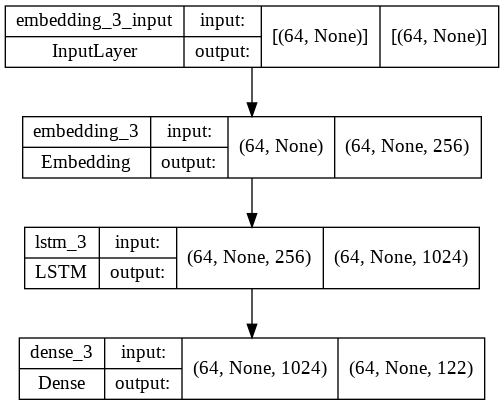

In [ ]:
# visualizing the model
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names = True,
    to_file = 'model.png'
)

In [ ]:
# training model // no need to split in train and test
 # add loss function and optimizer

 # loss function cross entropy

def loss(labels,logits):
  entropy = tf.keras.losses.sparse_categorical_crossentropy(
      y_true = labels,
      y_pred = logits,
      from_logits = True
  )

  return entropy


  # compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

model.compile(
    optimizer = optimizer,
    loss = loss,
    metrics=['accuracy']
)

In [ ]:
# add early stopping in case the model is not improving
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience = 5,
    monitor = 'loss',
    restore_best_weights = 1,
    verbose = 1
)

In [ ]:
# add model checkpoints

# create_checkpoint directory
# google drive path is needed here

# checkpoints = '/content/drive/My Drive/cc_project_model/checkpoints'
# os.makedirs(checkpoints, exist_ok=True)

# checkpoint_path = os.path.join(checkpoints,'chkpt_{epoch}')
# checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True)

### **Train Model**

In [ ]:
# train the model

# define parameters

# epochs = 11
# steps_per_epoch = 1500
# print('epochs', epochs)
# print('steps per epoch', steps_per_epoch)


# #training

# history = model.fit(
#     x= train_dataset,
#     epochs= epochs,
#     steps_per_epoch = steps_per_epoch,
#     callbacks = [
#                  checkpoint_callback,
#                  early_stopping
                 
#     ]
# )


# path = '/content/drive/My Drive/cc_project_model/creative_recipes_in_culinary_art.h5'

# # save model in google drive
# model.save(path,save_format='h5')


In [ ]:
# plot epoch vs loss graph

# def render_training_history(training_history):
#   loss = training_history.history['loss']
#   plt.title('Loss')
#   plt.xlabel('Epoch')
#   plt.ylabel('Loss')
#   plt.plot(loss, label='Training set')
#   plt.legend()
#   plt.grid(linestyle='--', linewidth=1, alpha=0.5)
#   plt.show()
  
# render_training_history(history)


### **Load the Latest Checkpoint and Rebuild the Model**

In [ ]:
# #@title Download Saved Model
# !pip install --upgrade --no-cache-dir  gdown==4.3.0
# # !pip install -U --no-cache-dir gdown --pre
# !gdown --id '1-M-Skk4PJW1YA2HTDktS6ZF6W4XPSHqP'
# import gdown, os

# url = "https://drive.google.com/drive/folders/1-BMUj5fWlFTMCB4Tnxkq1yUwO9b76S-O?usp=sharing"

# download_successful = None # A workaround to make sure that gdown downloads the whole folder successfully, see https://github.com/wkentaro/gdown/issues/43
# while download_successful == None:
#   download_successful = gdown.download_folder(url, quiet=True, use_cookies=False)
#   os.system('rm ~/.cache/gdown/cookies.json')



In [ ]:
# rebuild the model with batch size 1
checkpoints = '/content/drive/My Drive/cc_project_model/checkpoints'
# print(checkpoints)
small_batch_size = 1
simple_model = build_model(vocabulary_size =vocabulary_size ,embedding_dimension = 256, rnn_units =1024, batch_size= small_batch_size)
simple_model.load_weights(tf.train.latest_checkpoint(checkpoints))
simple_model.build(tf.TensorShape([small_batch_size]))
simple_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (1, None, 256)            31232     
                                                                 
 lstm_4 (LSTM)               (1, None, 1024)           5246976   
                                                                 
 dense_4 (Dense)             (1, None, 122)            125050    
                                                                 
Total params: 5,403,258
Trainable params: 5,403,258
Non-trainable params: 0
_________________________________________________________________


### **Generate Recipes**

In [ ]:
# Generate recipes with pretrained model

def generate_text(model, start_string, num_generate = 1000, randomness=1.0):
    
  
    padded_start_string = stop_word_recipe_name + start_string
    # Convert start word in numbers
    input_indices = np.array(tokenizer.texts_to_sequences([padded_start_string]))
    # recipe_generated
    recipe_generated = []
    # Here batch size == 1.
    model.reset_states()
    for char_index in range(num_generate):
        predictions = model(input_indices)
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)
        
        # Using a categorical distribution
        predictions = predictions / randomness
        
        predicted_id = tf.random.categorical(
            predictions,
            num_samples=1
        )[-1, 0].numpy()

        # pass predicted character as a next input with previous hidden state
        input_indices = tf.expand_dims([predicted_id], 0)
        
        next_character = tokenizer.sequences_to_texts(input_indices.numpy())[0]
        recipe_generated.append(next_character)
    return (padded_start_string + ''.join(recipe_generated))

In [ ]:
def generate_recipe(model):
    # recipe_length = 1000
    recipe_length = 1000 #@param {type:"slider", min:500, max:1500, step:100}
    randomness = 0.6 #@param {type:"slider", min:0.1, max:1.0, step:0.1}
    
    start_words_for_recipe_name = 'Paneer' #@param ['Cabbage', 'Paneer', 'Lentil', 'Masala', 'Tomato', 'Rajasthani','Spicy'] {allow-input: true}

    generated_text = generate_text(
        model,
        start_string=start_words_for_recipe_name,
        num_generate = recipe_length,
        randomness=randomness
    )
    print(f'Starting word: "{start_words_for_recipe_name}"\n randomness: {randomness}')
    print('-----------------------------------')
    print(generated_text)
    print('\n\n')

In [ ]:
generate_recipe(simple_model)

Starting word: "Paneer"
 randomness: 0.6
-----------------------------------
$Paneer Balls Recipe in Simmering
@1 cup All Purpose Flour (MaidaT,1/4 cup Caster Sugar,1 Whole Eggs,1 teaspoon Vanilla Extract,100 grams Sugar,1 teaspoon Vanilla Extract,1 pinch Salt
*)o make Breakfast Basil Recipe, take one tables in 1 cup of water and mash the potatoes. Keep aside and refrigerate it for 20 minutes.Heat oil in a skillet for the tempering. Add florets and panch dosa on the tawa. Leave the curry to come to a rolling boil, turn down the flame and add salt as well as the batter pointed you does not have thicker still will don't cover. Grind together to make a paste.Add coconut and mix well. Check for salt. Add more yogurt and stir continuously, while it is skin, turn off the flame and garnish with fresh coriander.Serve Bakery Style Baked Nippattu or rose start masalayo masala cheese on the sides.Serve Pan Roast Bok Chunks as a tea time snack or pack it in your kids snack boxes.κκκκκκκκκκκκκκκκκκ